 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

In [2]:
#Set Paths
whale_path = Path("Resources/whale_returns.csv")
algo_path = Path("Resources/algo_returns.csv")
sp500_path = Path("Resources/sp500_history.csv")

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [3]:
# Reading whale returns
whale_df = pd.read_csv(whale_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
whale_df.sort_index(ascending=True)
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [4]:
# Count nulls
whale_df.isnull()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,True,True,True,True
2015-03-03,False,False,False,False
2015-03-04,False,False,False,False
2015-03-05,False,False,False,False
2015-03-06,False,False,False,False
...,...,...,...,...
2019-04-25,False,False,False,False
2019-04-26,False,False,False,False
2019-04-29,False,False,False,False


In [5]:
# Drop nulls
whale_df.dropna(inplace=True)
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


In [6]:
#rename columns for better sizing in graphs later on
whale_df.rename(columns={'SOROS FUND MANAGEMENT LLC':'Soros LLC','TIGER GLOBAL MANAGEMENT LLC':'Tiger LLC','BERKSHIRE HATHAWAY INC':'Berk-Hath','PAULSON & CO.INC. ':'Paulson Inc'}, inplace=True)
whale_df.head()

,Soros LLC,Paulson Inc,Tiger LLC,Berk-Hath
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [7]:
# Reading algorithmic returns
algo_df = pd.read_csv(algo_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
algo_df.sort_index(ascending=True)
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [8]:
# Count nulls
algo_df.isnull()

,Algo 1,Algo 2
Date,,
2014-05-28,False,True
2014-05-29,False,True
2014-05-30,False,True
2014-06-02,False,True
2014-06-03,False,True
...,...,...
2019-04-25,False,False
2019-04-26,False,False
2019-04-29,False,False


In [9]:
# Drop nulls
algo_df.dropna(inplace=True)
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [11]:
# Reading S&P 500 Closing Prices
sp500_hist = pd.read_csv(sp500_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
sp500_hist.sort_index(ascending=True, inplace=True)
sp500_hist.tail()

,Close
Date,
2019-04-16,$2907.06
2019-04-17,$2900.45
2019-04-18,$2905.03
2019-04-22,$2907.97
2019-04-23,$2933.68


In [12]:
# Check Data Types
sp500_hist.dtypes

Close    object
dtype: object

In [13]:
#Convert to string and remove the Dollar Sign in order to convert to an integer later
sp500_hist['Close'] = sp500_hist['Close'].str.replace('$',' ', regex=True)
sp500_hist.head()

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


In [14]:
# Fix Data Types, Convert to Integer
sp500_hist['Close'] = pd.to_numeric(sp500_hist['Close']).astype('int')

In [15]:
# Calculate Daily Returns
sp500_df = sp500_hist.pct_change()

In [16]:
sp500_df.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000693
2012-10-03,0.003460
2012-10-04,0.007586
2012-10-05,-0.000684


In [17]:
# Drop nulls
sp500_df.dropna(inplace=True)

In [18]:
# Rename `Close` Column to be specific to this portfolio.
sp500_df.rename(columns={'Close':'SP500'}, inplace=True)
sp500_df.head()

,SP500
Date,
2012-10-02,0.000693
2012-10-03,0.003460
2012-10-04,0.007586
2012-10-05,-0.000684
2012-10-08,-0.003425


## Combine Whale, Algorithmic, and S&P 500 Returns

In [19]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_returns = pd.concat([whale_df, algo_df, sp500_df], axis="columns", join="inner")
combined_returns.head()

,Soros LLC,Paulson Inc,Tiger LLC,Berk-Hath,Algo 1,Algo 2,SP500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004724
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004271
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001430
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014279
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003863


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Analysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Daily Returns of all Portfolios'}, xlabel='Date'>

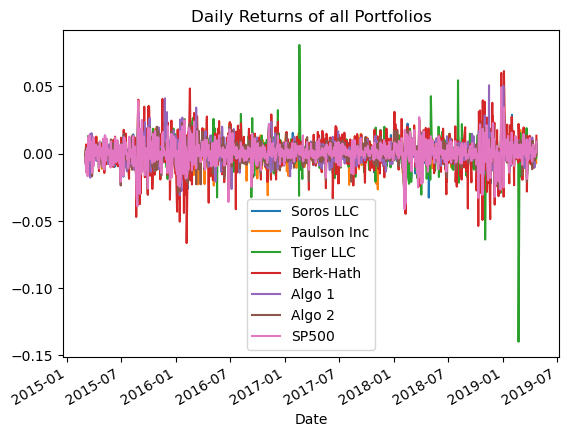

In [20]:
# Plot daily returns of all portfolios
combined_returns.plot(title="Daily Returns of all Portfolios")

#### Calculate and Plot cumulative returns.

In [21]:
# Calculate cumulative returns of all portfolios
cum_returns = (1 + combined_returns).cumprod()
cum_returns.head()

,Soros LLC,Paulson Inc,Tiger LLC,Berk-Hath,Algo 1,Algo 2,SP500
Date,,,,,,,
2015-03-03,0.998734,0.995019,0.999504,0.993431,0.998058,0.999051,0.995276
2015-03-04,1.000962,0.998245,0.996972,0.997617,0.989486,1.001464,0.991025
2015-03-05,1.004981,1.002314,0.999319,1.004327,0.988541,1.005794,0.992442
2015-03-06,0.997037,0.998731,0.990844,0.991172,0.983641,0.994267,0.978271
2015-03-09,0.997617,1.002951,0.996633,0.989534,0.978283,0.995563,0.982050


<AxesSubplot:title={'center':'Cumulative Returns of all Portfolios'}, xlabel='Date'>

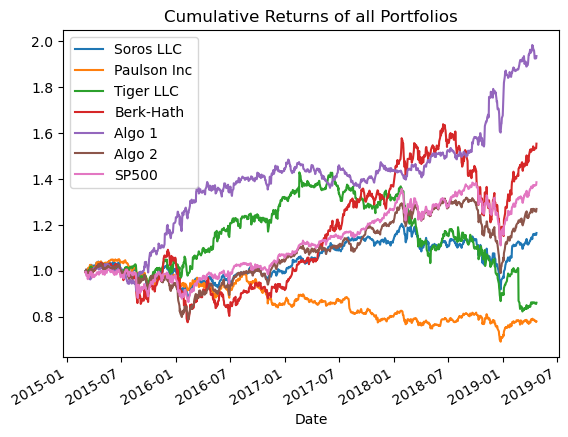

In [22]:
# Plot cumulative returns
cum_returns.plot(title="Cumulative Returns of all Portfolios")

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:title={'center':'Box Plot for all Portfolios'}>

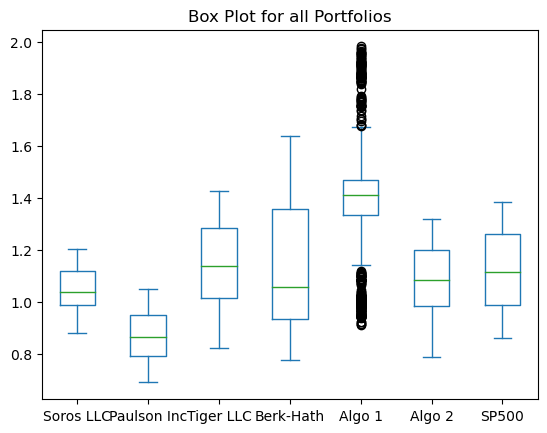

In [23]:
# Box plot to visually show risk
cum_returns.plot.box(title="Box Plot for all Portfolios")

### Calculate Standard Deviations

In [24]:
# Calculate the daily standard deviations of all portfolios
all_std = combined_returns.std()
all_std.sort_values(ascending=False, inplace=True)
all_std.head(7)

Berk-Hath      0.012919
Tiger LLC      0.010894
SP500          0.008553
Algo 2         0.008342
Soros LLC      0.007895
Algo 1         0.007620
Paulson Inc    0.007023
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [25]:
# Calculate the daily standard deviation of S&P 500
sp500_std = combined_returns['SP500'].std()
# Determine which portfolios are riskier than the S&P 500
for row in all_std.iteritems():
    #print rows
    if row[1] > sp500_std:
        print(f"{row[0]} is riskier than S&P 500.")

Berk-Hath is riskier than S&P 500.
Tiger LLC is riskier than S&P 500.


### Calculate the Annualized Standard Deviation

In [26]:
# Calculate the annualized standard deviation (252 trading days)
ann_std = combined_returns.std() * np.sqrt(252)
ann_std.head(7)

Soros LLC      0.125335
Paulson Inc    0.111488
Tiger LLC      0.172936
Berk-Hath      0.205077
Algo 1         0.120967
Algo 2         0.132430
SP500          0.135771
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'Rolling 21 Day Standard Deviations'}, xlabel='Date'>

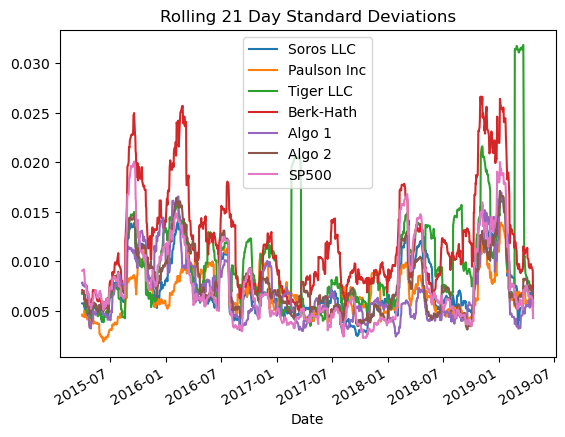

In [27]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
combined_std_21 = combined_returns.rolling(window=21).std()
# Plot the rolling standard deviation
combined_std_21.plot(title="Rolling 21 Day Standard Deviations")

### Calculate and plot the correlation

In [28]:
# Calculate the correlation
correlation = combined_returns.corr()
# Display de correlation matrix
correlation

,Soros LLC,Paulson Inc,Tiger LLC,Berk-Hath,Algo 1,Algo 2,SP500
Soros LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837835
Paulson Inc,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.670319
Tiger LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.624059
Berk-Hath,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.750997
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279497
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858858
SP500,0.837835,0.670319,0.624059,0.750997,0.279497,0.858858,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [29]:
# Calculate covariance of a single portfolio
algo1_covariance = combined_returns['Algo 1'].cov(combined_returns['SP500'])
# Calculate variance of S&P 500
variance = combined_returns['SP500'].var()
# Computing beta
algo1_beta = algo1_covariance / variance
# Plot beta trend
print(algo1_beta)

0.2490209399075548


<AxesSubplot:title={'center':'Algorithm One Rolling 60 Day Beta'}, xlabel='Date'>

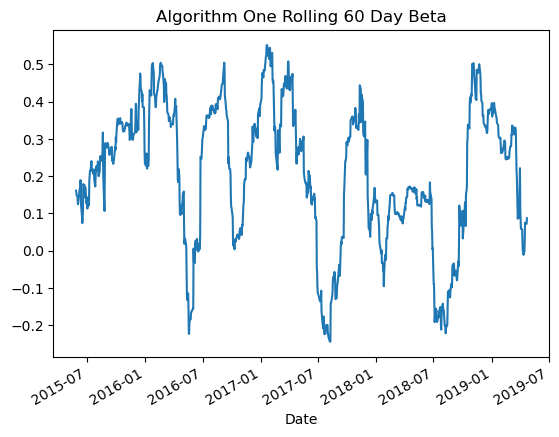

In [30]:
#Calculate the rolling 60 Day covariance of Algorithm 1 
rolling_algo1_covariance = combined_returns['Algo 1'].rolling(window=60).cov(combined_returns['SP500'])
rolling_variance = combined_returns['SP500'].rolling(window=60).var()
#Calculate the Rolling Beta
rolling_algo1_beta = rolling_algo1_covariance / rolling_variance
#Plot the Rolling Beta
rolling_algo1_beta.plot(title="Algorithm One Rolling 60 Day Beta")

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

<AxesSubplot:title={'center':'Exponentially Weighted Moving Std 21 Day Halflife'}, xlabel='Date'>

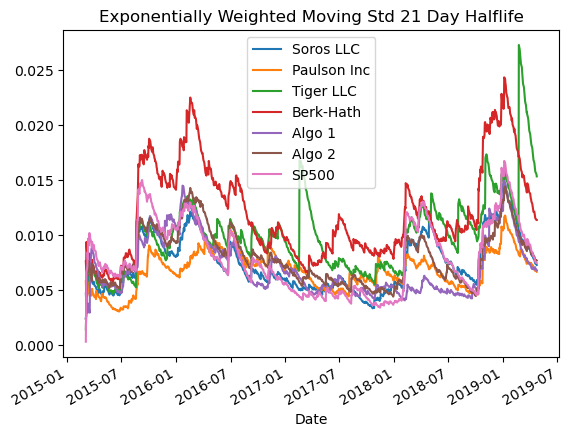

In [31]:
# Use `ewm` to calculate the rolling window
combined_ewm = combined_returns.ewm(halflife=21).std()
combined_ewm.plot(title="Exponentially Weighted Moving Std 21 Day Halflife")

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [32]:
# Annualized Sharpe Ratios
sharpe_ratio = (combined_returns.mean() * 252) / (combined_returns.std()*np.sqrt(252))
sharpe_ratio.sort_values(ascending=False, inplace=True)
sharpe_ratio.head(7)

Algo 1         1.378648
SP500          0.648240
Berk-Hath      0.621810
Algo 2         0.501364
Soros LLC      0.356417
Tiger LLC     -0.121060
Paulson Inc   -0.483570
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

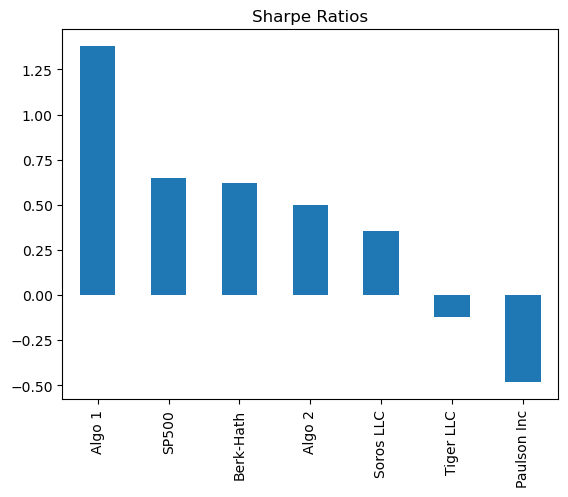

In [34]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio.plot.bar(title='Sharpe Ratios')

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Both of the algorithmic strategies are doing well and have a lower standard deviation than the S&P500. This means they fluctuated less than the overall market. Both have a positive sharpe ratio higher than Soros, Paulson, and Tiger LLC. Only Berkshire Hathaway outperforms algorithm two. Algorithm One has the best Sharpe ratio overall, meaning it has the best reward to risk. Algorithm one is also not highly correlated to the S&P500, meaning that it would be a great choice to diversify any portfolio. Algorithm two is performing well comparatively, but is highly correlated to the S&P500, or the overall market. 

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [35]:
# Reading data from 1st stock
amzn_path = Path("Resources/Amazon_Data.csv")
amzn_df = pd.read_csv(amzn_path, parse_dates=True, infer_datetime_format=True)
amzn_df.sort_index(ascending=True)
amzn_df.rename(columns={'Close':'Amazon'}, inplace=True)
amzn_df.head()

,Date,Amazon
0,7/1/2015 16:00:00,21.87
1,7/2/2015 16:00:00,21.89
2,7/6/2015 16:00:00,21.80
3,7/7/2015 16:00:00,21.84
4,7/8/2015 16:00:00,21.49


In [36]:
#Fix the Date Column and drop the timestamp
amzn_df["Date"] = pd.to_datetime(amzn_df['Date'])
amzn_df["Date"] = amzn_df["Date"].dt.date
amzn_df.head()

,Date,Amazon
0,2015-07-01,21.87
1,2015-07-02,21.89
2,2015-07-06,21.80
3,2015-07-07,21.84
4,2015-07-08,21.49


In [37]:
# Reading data from 2nd stock
cvx_path = Path("Resources/Chevron_Data.csv")
cvx_df = pd.read_csv(cvx_path, parse_dates=True, infer_datetime_format=True)
cvx_df.sort_index(ascending=True)
cvx_df.rename(columns={'Close':'Chevron'}, inplace=True)
#Drop date column so it's not duplicated in the combined dataframe
cvx_df.drop(columns=['Date'], inplace=True)
cvx_df.head()

,Chevron
0,96.09
1,95.87
2,94.77
3,95.27
4,93.56


In [38]:
# Reading data from 3rd stock
csco_path = Path("Resources/CSCO_Data.csv")
csco_df = pd.read_csv(csco_path, parse_dates=True, infer_datetime_format=True)
csco_df.sort_index(ascending=True)
csco_df.rename(columns={'Close':'Cisco'}, inplace=True)
#Drop date column so it's not duplicated in the combined dataframe
csco_df.drop(columns=['Date'], inplace=True)
csco_df.head()

,Cisco
0,27.35
1,27.33
2,27.22
3,27.36
4,26.99


In [43]:
# Combine all stocks in a single DataFrame
close_prices = pd.concat([amzn_df, cvx_df, csco_df], axis="columns", join="inner")
close_prices.head()

,Date,Amazon,Chevron,Cisco
0,2015-07-01,21.87,96.09,27.35
1,2015-07-02,21.89,95.87,27.33
2,2015-07-06,21.80,94.77,27.22
3,2015-07-07,21.84,95.27,27.36
4,2015-07-08,21.49,93.56,26.99


In [44]:
# Reset Date index
close_prices.set_index('Date', inplace=True)
close_prices.head()

,Amazon,Chevron,Cisco
Date,,,
2015-07-01,21.87,96.09,27.35
2015-07-02,21.89,95.87,27.33
2015-07-06,21.80,94.77,27.22
2015-07-07,21.84,95.27,27.36
2015-07-08,21.49,93.56,26.99


In [45]:
# Calculate daily returns
daily_returns = close_prices.pct_change()
# Drop NAs
daily_returns.dropna(inplace=True)
# Display sample data
daily_returns.head()

,Amazon,Chevron,Cisco
Date,,,
2015-07-02,0.000914,-0.002290,-0.000731
2015-07-06,-0.004111,-0.011474,-0.004025
2015-07-07,0.001835,0.005276,0.005143
2015-07-08,-0.016026,-0.017949,-0.013523
2015-07-09,0.010703,0.002351,-0.002964


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [46]:
# Set weights
weights = [1/3, 1/3, 1/3]
# Calculate portfolio return
portfolio_returns = daily_returns.dot(weights)
# Display sample data
portfolio_returns.head()

Date
2015-07-02   -0.000702
2015-07-06   -0.006537
2015-07-07    0.004085
2015-07-08   -0.015833
2015-07-09    0.003363
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [47]:
# Join your returns DataFrame to the original returns DataFrame
all_returns = pd.concat([combined_returns, portfolio_returns], axis="columns", join="inner")
all_returns.head()

C:\Users\Chelsea\anaconda3\envs\dev\lib\site-packages\pandas\core\indexes\base.py:334: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  joined_ndarray, lidx, ridx = libjoin.inner_join_indexer(sv, ov)


,Soros LLC,Paulson Inc,Tiger LLC,Berk-Hath,Algo 1,Algo 2,SP500,0
Date,,,,,,,,
2015-07-02,0.000613,-0.000139,-0.001781,-0.009721,-0.002005,-0.005172,-0.000481,-0.000702
2015-07-06,-0.005870,-0.002186,-0.001083,-0.005799,-0.014638,-0.004958,-0.003854,-0.006537
2015-07-07,0.000597,0.003962,0.004652,-0.007634,-0.004611,-0.002519,0.006286,0.004085
2015-07-08,-0.017211,-0.007654,-0.014788,-0.011737,-0.013853,-0.015528,-0.016819,-0.015833
2015-07-09,0.007472,0.003887,0.000441,0.017670,0.014090,0.003624,0.002444,0.003363


In [48]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
all_returns.dropna(inplace=True)
all_returns.head()

,Soros LLC,Paulson Inc,Tiger LLC,Berk-Hath,Algo 1,Algo 2,SP500,0
Date,,,,,,,,
2015-07-02,0.000613,-0.000139,-0.001781,-0.009721,-0.002005,-0.005172,-0.000481,-0.000702
2015-07-06,-0.005870,-0.002186,-0.001083,-0.005799,-0.014638,-0.004958,-0.003854,-0.006537
2015-07-07,0.000597,0.003962,0.004652,-0.007634,-0.004611,-0.002519,0.006286,0.004085
2015-07-08,-0.017211,-0.007654,-0.014788,-0.011737,-0.013853,-0.015528,-0.016819,-0.015833
2015-07-09,0.007472,0.003887,0.000441,0.017670,0.014090,0.003624,0.002444,0.003363


In [49]:
#Rename my column
all_returns.rename(columns={ 0 :'My Port'}, inplace=True)
all_returns.head()

,Soros LLC,Paulson Inc,Tiger LLC,Berk-Hath,Algo 1,Algo 2,SP500,My Port
Date,,,,,,,,
2015-07-02,0.000613,-0.000139,-0.001781,-0.009721,-0.002005,-0.005172,-0.000481,-0.000702
2015-07-06,-0.005870,-0.002186,-0.001083,-0.005799,-0.014638,-0.004958,-0.003854,-0.006537
2015-07-07,0.000597,0.003962,0.004652,-0.007634,-0.004611,-0.002519,0.006286,0.004085
2015-07-08,-0.017211,-0.007654,-0.014788,-0.011737,-0.013853,-0.015528,-0.016819,-0.015833
2015-07-09,0.007472,0.003887,0.000441,0.017670,0.014090,0.003624,0.002444,0.003363


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [50]:
# Calculate the annualized `std`
all_ann_std = all_returns.std() * np.sqrt(252)
all_ann_std.sort_values(inplace=True)
all_ann_std

Paulson Inc    0.114944
Algo 1         0.123510
Soros LLC      0.128355
Algo 2         0.135167
SP500          0.137658
Tiger LLC      0.178473
My Port        0.193309
Berk-Hath      0.211664
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:title={'center':'All Portfolios Rolling 21 Day Standard Deviation'}, xlabel='Date'>

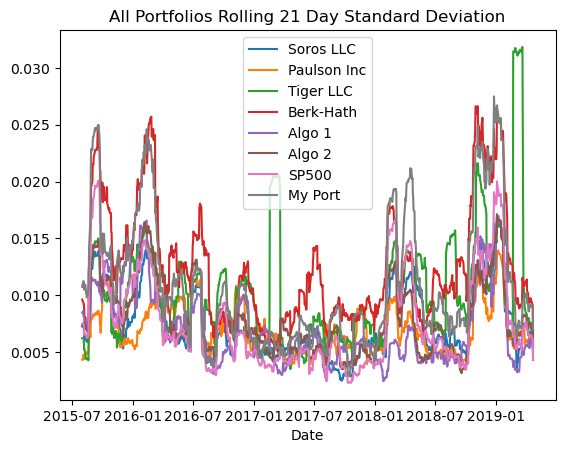

In [51]:
# Calculate rolling standard deviation
all_std_21 = all_returns.rolling(window=21).std()
# Plot rolling standard deviation
all_std_21.plot(title='All Portfolios Rolling 21 Day Standard Deviation')

### Calculate and plot the correlation

In [52]:
# Calculate and plot the correlation
all_correlation = all_returns.corr()
all_correlation

,Soros LLC,Paulson Inc,Tiger LLC,Berk-Hath,Algo 1,Algo 2,SP500,My Port
Soros LLC,1.000000,0.699850,0.554251,0.753518,0.327588,0.827250,0.839149,0.722794
Paulson Inc,0.699850,1.000000,0.428078,0.543269,0.277653,0.679183,0.673174,0.550235
Tiger LLC,0.554251,0.428078,1.000000,0.416977,0.166323,0.497302,0.615985,0.475785
Berk-Hath,0.753518,0.543269,0.416977,1.000000,0.298148,0.686277,0.754380,0.699278
Algo 1,0.327588,0.277653,0.166323,0.298148,1.000000,0.300089,0.287040,0.304564
Algo 2,0.827250,0.679183,0.497302,0.686277,0.300089,1.000000,0.858646,0.721009
SP500,0.839149,0.673174,0.615985,0.754380,0.287040,0.858646,1.000000,0.849455
My Port,0.722794,0.550235,0.475785,0.699278,0.304564,0.721009,0.849455,1.000000


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:title={'center':'My Portfolio Rolling 60 Day Beta'}, xlabel='Date'>

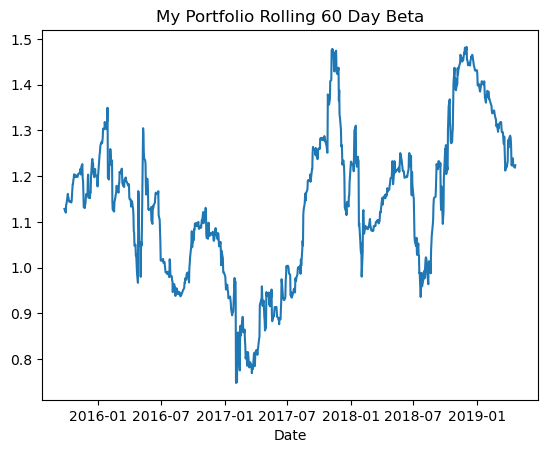

In [53]:
# Calculate and plot Beta
rolling_portfolio_covariance = all_returns['My Port'].rolling(window=60).cov(all_returns['SP500'])
rolling_60_variance = all_returns['SP500'].rolling(window=60).var()
rolling_portfolio_beta = rolling_portfolio_covariance / rolling_60_variance
rolling_portfolio_beta.plot(title="My Portfolio Rolling 60 Day Beta")

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [55]:
# Calculate Annualized Sharpe Ratios
all_sharpe_ratio = (all_returns.mean() * 252) / (all_returns.std()*np.sqrt(252))
all_sharpe_ratio.sort_values(ascending=False, inplace=True)
all_sharpe_ratio.head(8)

Algo 1         1.459280
My Port        1.274039
SP500          0.728483
Berk-Hath      0.661717
Algo 2         0.527451
Soros LLC      0.363265
Tiger LLC     -0.130694
Paulson Inc   -0.599403
dtype: float64

<AxesSubplot:title={'center':'All Portfolios Sharpe Ratio'}>

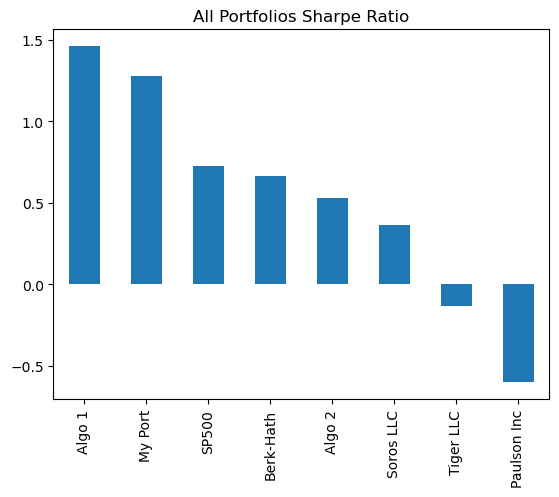

In [56]:
# Visualize the sharpe ratios as a bar plot
all_sharpe_ratio.plot.bar(title='All Portfolios Sharpe Ratio')

### How does your portfolio do?

Write your answer here!

## My Portfolio
I chose three very trusted, mainstream companies that I feel have grown well overall in their respective industries for the time period of 7/2015 to 7/2019. The stocks were Amazon, Cisco, and Chevron. I pulled this data from the Google Finance function in google sheets.  
## My Findings
My portfolio has a low standard deviation of 0.1933, meaning that it did not fluctuate very drastically during the time period, and it also has the second highest sharpe ratio of 1.2740 meaning it has a great return as compared with risk. My portfolio is however, very highly correlated to the overall market of S&P500, meaning that it might not be the best fit for someone who is looking to diversify. My portfolio is also highly correlated to Algorithm Two and Soros LLC, but due to it's higher sharpe ratio it might be a better investment than those two. 
I would purchase both my portfolio and the Algorithm One portfolio, as they are not highly correlated and would be a great combination. 